See the first version of this notebook [here](https://github.com/rajewsky-lab/planarian_lineages/blob/1741fc376574393980b7976b764ccdd536615150/graph_abstraction/epidermal-lineage.ipynb).

# Planaria lineages: the epidermal lineage

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as pl
import scanpy.api as sc

sc.settings.verbosity = 2  # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.settings.set_figure_params(dpi=150)  # low dpi (dots per inch) yields small inline figures
sc.logging.print_versions()

scanpy==1.0.3 anndata==0.5.8+3.gf10296c numpy==1.13.1 scipy==1.0.0 pandas==0.22.0 scikit-learn==0.19.1 statsmodels==0.8.0 python-igraph==0.7.1 louvain==0.6.1 


In [2]:
adata_full = sc.read('./data/171202/reg.dge.txt', cache=True).T

... reading from cache file ./cache/data-171202-reg.dge.h5ad


In [3]:
sc.pp.log1p(adata_full)

## Pseudotime series

No matter which definition for the epidermal markers we use, we obtain almost same results below.

In [4]:
# this uses marker genes for clusters obtained using Seurat
markers = pd.read_csv('./data/171202/epidermal_lineage.top10.markers.txt', sep='\t')
# markers = pd.read_csv('./data/171202/epidermal_lineage_markers.txt', sep='\t')
epidermal_markers = markers['gene'].values

# this uses the markers from the Wurtzel paper
# markers = pd.read_csv('./data/171202/Epidermal_markers_wurtzel.csv', header=None, sep='\t')
# epidermal_markers = markers[1].values
# epidermal_markers = [gene for gene in epidermal_markers if gene in adata_full.var_names]

In [5]:
adata = sc.read('./write/planaria.h5ad')

In [6]:
adata_full.obs = adata.obs
adata_full.uns['clusters_colors'] = adata.uns['clusters_colors']

In [7]:
path_1 = ['neoblast 1',
          'epidermal neoblasts', 'early epidermal progenitors',
          'late epidermal progenitors 1',
          'late epidermal progenitors 2', 'epidermis']

There is significant overlap in all stages of the epidermal lineage except for the last - the transition to the epidermis cluster seems disconnected.

Only the following markers seem to be connecting the late epidermal progenitors with the epidermis:     'dd_Smed_v6_80_0', 'dd_Smed_v6_146_0', 'dd_Smed_v6_2178_0', 'dd_Smed_v6_18_0'

saving figure to file ./figures/paga_path_epidermal.png


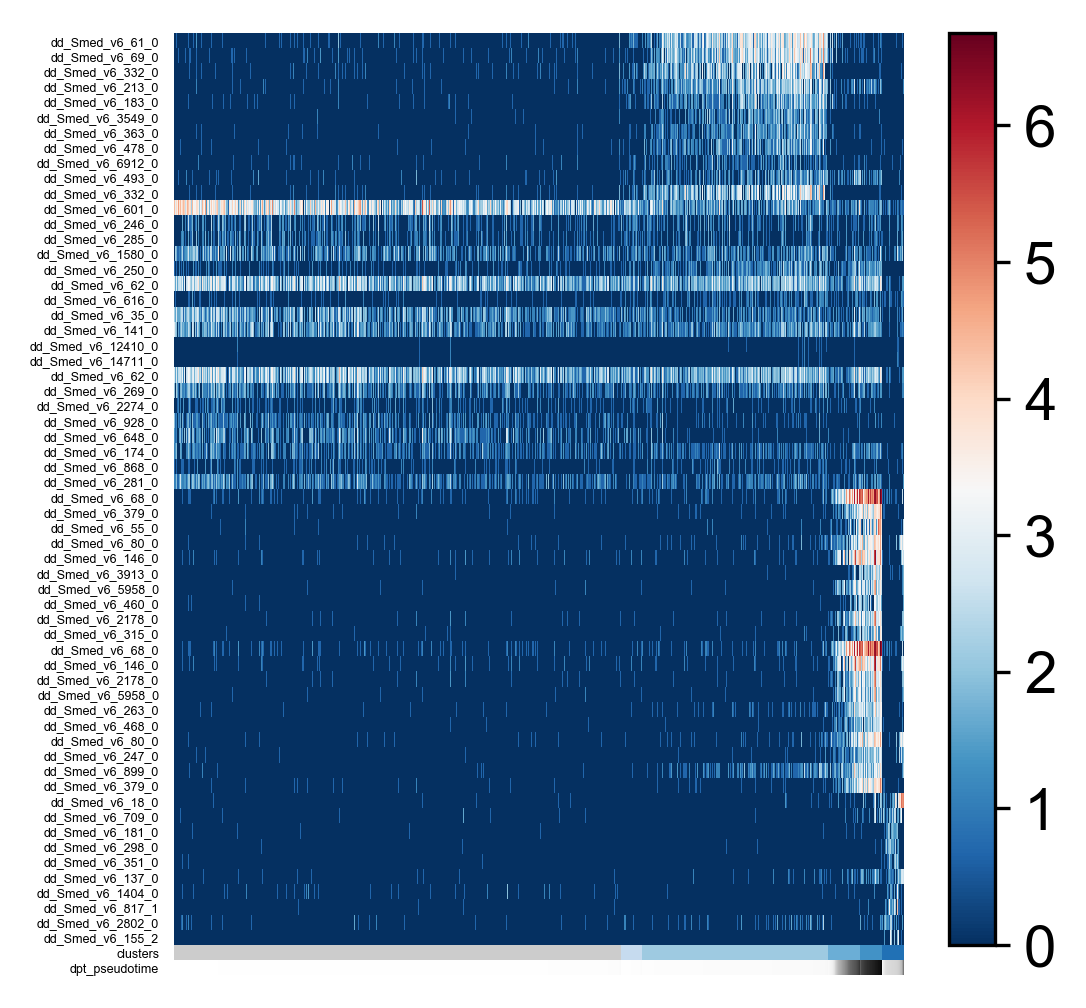

In [8]:
sc.pl.paga_path(adata_full, path_1, epidermal_markers, groups_key='clusters', show_node_names=False, ytick_fontsize=3, save='_epidermal')

## PAGA

In [9]:
epidermal_markers = np.unique(epidermal_markers)

In [10]:
adata_epidermal = adata_full[:, epidermal_markers]

In [11]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 21612 × 52 
    obs: 'clusters', 'dpt_pseudotime'
    uns: 'clusters_colors'

In [12]:
epidermal_clusters = [
    'epidermal neoblasts',
    'early epidermal progenitors',
    'late epidermal progenitors 1',
    'late epidermal progenitors 2', 'epidermis']

In [13]:
adata_epidermal = adata_epidermal[
    adata_full.obs['clusters'].isin(
        epidermal_clusters)]

Now, we're left with only 4009 cells.

In [14]:
adata_epidermal

View of AnnData object with n_obs × n_vars = 4009 × 52 
    obs: 'clusters', 'dpt_pseudotime'
    uns: 'clusters_colors'

In [15]:
sc.tl.tsne(adata_epidermal, n_pcs=0)

computing tSNE
    using the 'MulticoreTSNE' package by Ulyanov (2017)
    finished (0:00:12.16)


In [16]:
sc.settings.set_figure_params(dpi=80)

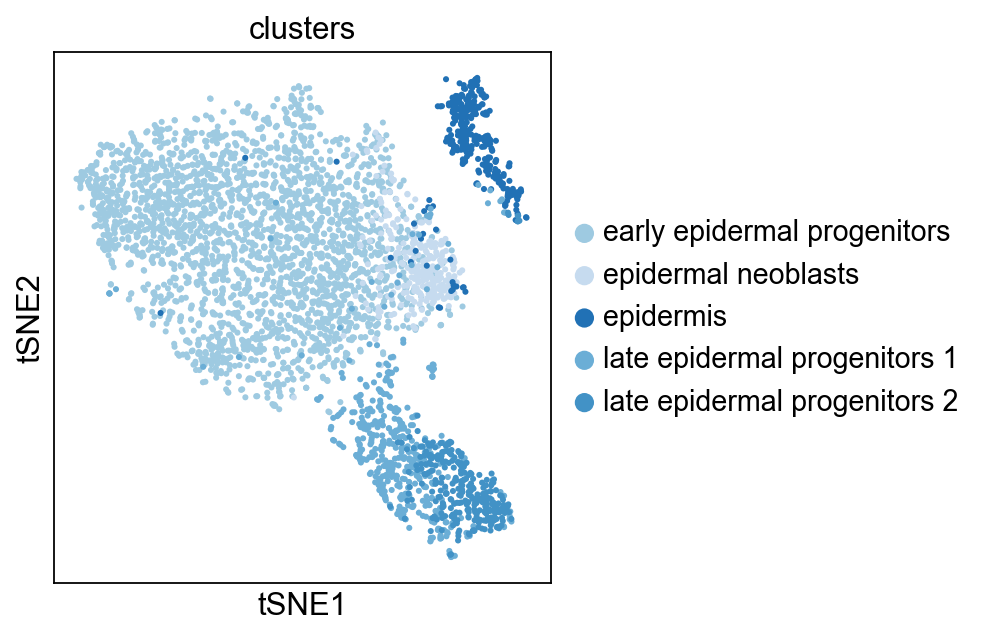

In [17]:
sc.pl.tsne(adata_epidermal, color='clusters')

In [42]:
sc.pp.neighbors(adata_epidermal, n_neighbors=5, n_pcs=0)

computing neighbors
    initialized `.distances` `.connectivities` 
    finished (0:00:00.86)


In [43]:
sc.tl.paga(adata_epidermal, groups='clusters')

running partition-based graph abstraction (PAGA)
    initialized `.distances` `.connectivities` 
    finished (0:00:00.08)


saving figure to file ./figures/paga_compare_epidermal.png


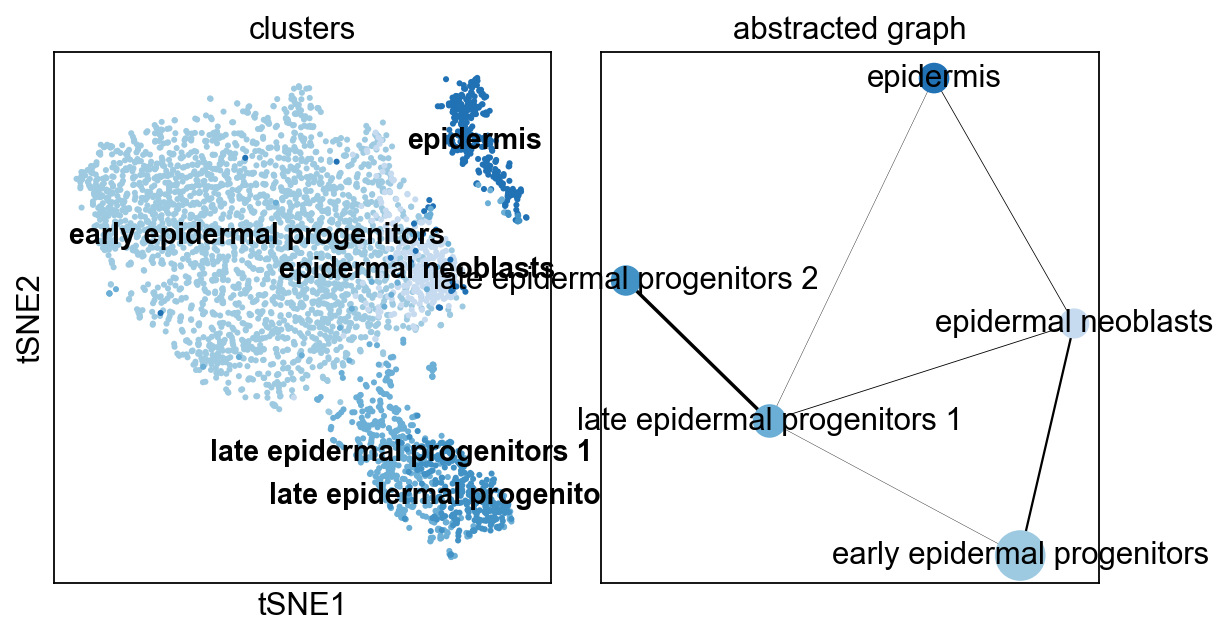

In [53]:
sc.pl.paga_compare(adata_epidermal, threshold_solid=0.02, save='_epidermal')

In [45]:
adata_epidermal.obs['clusters'].cat.categories.values

array(['early epidermal progenitors', 'epidermal neoblasts', 'epidermis',
       'late epidermal progenitors 1', 'late epidermal progenitors 2'],
      dtype=object)

In [46]:
adata_epidermal.uns['paga']['confidence'].toarray()

array([[0.        , 0.13495164, 0.00638533, 0.02229161, 0.        ],
       [0.13495164, 0.        , 0.0462298 , 0.05055431, 0.        ],
       [0.00638533, 0.0462298 , 0.        , 0.02261545, 0.01618259],
       [0.02229161, 0.05055431, 0.02261545, 0.        , 0.20832234],
       [0.        , 0.        , 0.01618259, 0.20832234, 0.        ]])

In [47]:
adata_epidermal.uns['paga']['connectivities'].toarray()

array([[  0., 593.,  29., 123.,   0.],
       [593.,   0.,  70.,  93.,   0.],
       [ 29.,  70.,   0.,  43.,  25.],
       [123.,  93.,  43.,   0., 391.],
       [  0.,   0.,  25., 391.,   0.]])